<h1>Importing Dataset</h1>

In [1]:
import pandas as pd

df=pd.read_csv('english_hate_dataset.csv')
df.head()

,Unnamed: 0,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


<h1>Dropping non usable columns</h1>

In [2]:
df=df.drop(df.columns[0],axis=1)
df=df.drop('acl.id',axis=1)
df=df.drop('X1',axis=1)
df=df.drop('round.base',axis=1)
df=df.drop('annotator',axis=1)
df=df.drop('round',axis=1)
df=df.drop('acl.id.matched',axis=1)


df.head()

,text,label,type,target,level,split
0,dalits are lowlives,hate,notgiven,notgiven,original,train
1,gay people are a burden to our society,hate,notgiven,notgiven,original,train
2,Arabs are not welcome,hate,notgiven,notgiven,original,train
3,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train
4,bananas are for black people,hate,notgiven,notgiven,original,test


<h1>Dataset Evaluation</h1>

<function matplotlib.pyplot.show(close=None, block=None)>

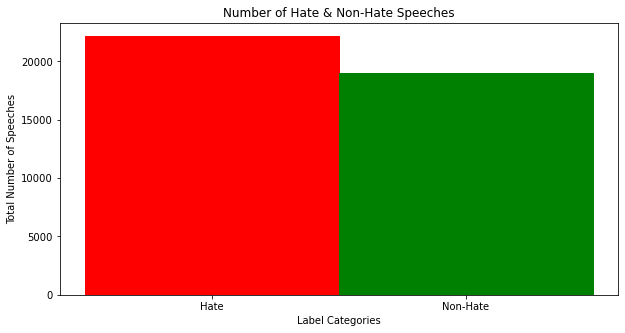

In [3]:
hate_count=df['label'].value_counts()['hate']
non_hate_count=df['label'].value_counts()['nothate']

labels=['Hate','Non-Hate']
values=[hate_count,non_hate_count]

import matplotlib.pyplot as plt

# generate bar chart for detecting hate and not hat speech volume
fig = plt.figure(figsize = (10, 5))
bars=plt.bar(labels,values,width=1)
bars[0].set_color('red')
bars[1].set_color('green')
plt.xlabel("Label Categories")
plt.ylabel("Total Number of Speeches")
plt.title("Number of Hate & Non-Hate Speeches")
plt.show


<h1>Text Preprocessing</h1>

In [4]:
# coverting data of hate non-hate to 1 and 0
df.loc[df['label']=='hate','label']=1
df.loc[df['label']=='nothate','label']=0
df.head()



,text,label,type,target,level,split
0,dalits are lowlives,1,notgiven,notgiven,original,train
1,gay people are a burden to our society,1,notgiven,notgiven,original,train
2,Arabs are not welcome,1,notgiven,notgiven,original,train
3,I'm not saying we should actually eliminate he...,1,notgiven,notgiven,original,train
4,bananas are for black people,1,notgiven,notgiven,original,test


<h3>Punctuation Removal</h3>

In [5]:
import string
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['clean_text']= df['text'].apply(lambda x:remove_punctuation(x))
df.head()

,text,label,type,target,level,split,clean_text
0,dalits are lowlives,1,notgiven,notgiven,original,train,dalits are lowlives
1,gay people are a burden to our society,1,notgiven,notgiven,original,train,gay people are a burden to our society
2,Arabs are not welcome,1,notgiven,notgiven,original,train,Arabs are not welcome
3,I'm not saying we should actually eliminate he...,1,notgiven,notgiven,original,train,Im not saying we should actually eliminate hee...
4,bananas are for black people,1,notgiven,notgiven,original,test,bananas are for black people


<h3>Lowering the Text</h3>

In [6]:
df['clean_text']= df['clean_text'].apply(lambda x: x.lower())

df.head()

,text,label,type,target,level,split,clean_text
0,dalits are lowlives,1,notgiven,notgiven,original,train,dalits are lowlives
1,gay people are a burden to our society,1,notgiven,notgiven,original,train,gay people are a burden to our society
2,Arabs are not welcome,1,notgiven,notgiven,original,train,arabs are not welcome
3,I'm not saying we should actually eliminate he...,1,notgiven,notgiven,original,train,im not saying we should actually eliminate hee...
4,bananas are for black people,1,notgiven,notgiven,original,test,bananas are for black people


<h3>Tokenization</h3>

In [7]:
from nltk.tokenize import word_tokenize


df['clean_text']=df['clean_text'].astype('string')
df['clean_text']= df['clean_text'].apply(lambda x: word_tokenize(x))

df.head()

c:\Users\farha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,text,label,type,target,level,split,clean_text
0,dalits are lowlives,1,notgiven,notgiven,original,train,"[dalits, are, lowlives]"
1,gay people are a burden to our society,1,notgiven,notgiven,original,train,"[gay, people, are, a, burden, to, our, society]"
2,Arabs are not welcome,1,notgiven,notgiven,original,train,"[arabs, are, not, welcome]"
3,I'm not saying we should actually eliminate he...,1,notgiven,notgiven,original,train,"[im, not, saying, we, should, actually, elimin..."
4,bananas are for black people,1,notgiven,notgiven,original,test,"[bananas, are, for, black, people]"


<h3>Stopword Removal</h3>

In [8]:
#importing nlp library
import nltk
# nltk.download('stopwords')

#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df['clean_text']= df['clean_text'].apply(lambda x:remove_stopwords(x))
df.head()

,text,label,type,target,level,split,clean_text
0,dalits are lowlives,1,notgiven,notgiven,original,train,"[dalits, lowlives]"
1,gay people are a burden to our society,1,notgiven,notgiven,original,train,"[gay, people, burden, society]"
2,Arabs are not welcome,1,notgiven,notgiven,original,train,"[arabs, welcome]"
3,I'm not saying we should actually eliminate he...,1,notgiven,notgiven,original,train,"[im, saying, actually, eliminate, heebs, wish,..."
4,bananas are for black people,1,notgiven,notgiven,original,test,"[bananas, black, people]"


<h3>Lemmatization</h3>

In [9]:
from nltk.stem import WordNetLemmatizer

# # nltk.download('wordnet')


#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text

df['clean_text']=df['clean_text'].apply(lambda x:lemmatizer(x))

df.head()

,text,label,type,target,level,split,clean_text
0,dalits are lowlives,1,notgiven,notgiven,original,train,"[dalits, lowlives]"
1,gay people are a burden to our society,1,notgiven,notgiven,original,train,"[gay, people, burden, society]"
2,Arabs are not welcome,1,notgiven,notgiven,original,train,"[arab, welcome]"
3,I'm not saying we should actually eliminate he...,1,notgiven,notgiven,original,train,"[im, saying, actually, eliminate, heebs, wish,..."
4,bananas are for black people,1,notgiven,notgiven,original,test,"[banana, black, people]"
